# Lab Assignment One: Exploring Table Data
Name: Marc Pham

## 1. Business Understanding

The data, funded by the Instituto Politécnico de Portalegre on April 23, 2021, aims to identify students at risk of dropping out of higher education.  The dataset includes 4,424 students who are classified as dropouts, current enrollees, or graduates.  For each student, the data includes 37 total features, including demographic features (e.g., race and gender) and economic factors (e.g., the inflation rate and unemployment rate at the time of their application) that may influence their likelihood for dropping out.  The funders’ original goal was to use machine learning techniques to detect which students are at risk of dropping out and implement targeted interventions, such as scholarships, to support these students.
</br></br>
The end goal of analyzing this dataset is to classify a student as a potential dropout or an enrollee/graduate based on economic factors and each student’s demographic features.  The results can help university admissions offices and government agencies determine which groups of students need additional support to get through higher education.  However, it is important to note that third parties could use these results to choose which students to accept or deny from a university.  Keeping this in mind, the final classification algorithm should not be trained on race since the Supreme Court banned the use of race in college admissions.
</br></br>
For the algorithm to be successful, we need the algorithm to accurately classify which students are dropping out.  It is less important if the model inaccurately predicts an Enrollee as a Graduate or vice versa.  As a result, we should use metrics like precision and recall to measure how well the algorithm does at classifying dropouts.  For our algorithm, recall measures the percentage of actual dropouts that the algorithm correctly classifies.  Our recall should be as close as possible to 100% to minimize the probability of missing any students at risk of dropping out.  Precision measures the percentage of students predicted to drop out who are actual dropouts.  Low precision means we are giving additional resources to many students not at risk of dropping out, while high precision means that resources are used effectively.  Although high precision is ideal, it would be acceptable to have lower precision, like 70%, if it significantly increases recall.  The balance between precision and recall will depend on how much financial flexibility institutions have.


Sources: [Dataset](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) </br>
M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

## 2. Data Understanding

### 2.1: Data Description
[1.5 points] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.

The dataset has a total of 37 features, so we will discuss 10 of the most relevant attributes.  The Target attribute, which is what we are aiming to predict, classifies students as Dropouts, Enrollees, or Graduates.  This attribute will replace Dropouts with 1, Enrollees with 2, and Graduates with 3.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', sep=';')
df = df.rename(columns = {
    'Daytime/evening attendance\t' : 'Daytime/evening attendance',               
    'Nacionality': 'Nationality'})

df['Target'].replace({'Dropout' : 1, 'Enrolled' : 2, 'Graduate' : 3}, inplace=True)

df_relevant = df[[
    'Previous qualification',
    'International',
    'Educational special needs',
    'Gender',
    'Scholarship holder',
    'Age at enrollment',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Target'
]]
df_relevant.head()

,Previous qualification,International,Educational special needs,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,1,0,0,1,0,20,10.8,1.4,1.74,1
1,1,0,0,1,0,19,13.9,-0.3,0.79,3
2,1,0,0,1,0,19,10.8,1.4,1.74,1
3,1,0,0,0,0,20,9.4,-0.8,-3.12,3
4,1,0,0,0,0,45,13.9,-0.3,0.79,3


The following table has descriptions and data types for each of the 10 relevant attributes.

In [3]:
data_types = pd.DataFrame()
data_types['Variables'] = df_relevant.columns
data_types['Type of Variable'] = ['Discrete Nominal','Discrete Nominal','Discrete Nominal','Discrete Nominal','Discrete Nominal','Discrete Ratio','Continuous Ratio','Continuous Ratio','Continuous Ratio','Discrete Nominal']
data_types['Data Type'] = ['Integer','Integer (Binary)','Integer (Binary)','Integer (Binary)','Integer (Binary)','Integer','Float','Float','Float','Integer']
data_types['Descriptions'] = [
    'Previous Education. Unique integers assigned to each of the 17 categories',
    'Yes, an international student or No',
    'Yes special needs or No special needs',
    'Male or Female',
    'Yes, Has a Scholarship or No Scholarship',
    'Student\'s age in years (Integer) at enrollment',
    'Percentage of people who are unemployed',
    'Rate at which prices increase over time',
    'Total output of goods produced by an economy over a time period',
    'Dropout, Graduate, or Enrolled'
]

# Allows you to view the entire long string.
pd.options.display.max_colwidth = 100
data_types

,Variables,Type of Variable,Data Type,Descriptions
0,Previous qualification,Discrete Nominal,Integer,Previous Education. Unique integers assigned to each of the 17 categories
1,International,Discrete Nominal,Integer (Binary),"Yes, an international student or No"
2,Educational special needs,Discrete Nominal,Integer (Binary),Yes special needs or No special needs
3,Gender,Discrete Nominal,Integer (Binary),Male or Female
4,Scholarship holder,Discrete Nominal,Integer (Binary),"Yes, Has a Scholarship or No Scholarship"
5,Age at enrollment,Discrete Ratio,Integer,Student's age in years (Integer) at enrollment
6,Unemployment rate,Continuous Ratio,Float,Percentage of people who are unemployed
7,Inflation rate,Continuous Ratio,Float,Rate at which prices increase over time
8,GDP,Continuous Ratio,Float,Total output of goods produced by an economy over a time period
9,Target,Discrete Nominal,Integer,"Dropout, Graduate, or Enrolled"


### 2.2: Data Quality

Before analyzing the data, it is important to identify any missing values, duplicate data, and outliers in the dataset.  Looking at the attributes, all attributes seem useful in in the analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Information from the dataframe shows that, out of 4424 instances, there are no missing values for any of the 10 attributes.  If missing values existed in the dataset, we could use K-Nearest Neighbors Imputation for numeric features and use the mode to impute categorical variables.

In [104]:
num_dupes = len(df[df.duplicated()])
print(f"Number of Duplicates: {num_dupes}")

Number of Duplicates: 0


If we examine the dataset with all available attributes, we find that there are 0 duplicated instances.  This is likely because the data was already pre-processed to remove any duplicates.

In [7]:
numeric_variables = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Curricular units 1st sem (credited)',
   'Curricular units 1st sem (enrolled)',
   'Curricular units 1st sem (evaluations)',
   'Curricular units 1st sem (approved)',
   'Curricular units 1st sem (grade)',
   'Curricular units 1st sem (without evaluations)',
   'Curricular units 2nd sem (credited)',
   'Curricular units 2nd sem (enrolled)',
   'Curricular units 2nd sem (evaluations)',
   'Curricular units 2nd sem (approved)',
   'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)', 
]

# Gets only the min and max from the 5-number summary.
df[numeric_variables[0:6]].describe().iloc[[3,7]]

,Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP
min,95.0,95.0,17.0,7.6,-0.8,-4.06
max,190.0,190.0,70.0,16.2,3.7,3.51


In [8]:
df[numeric_variables[6:]].describe().iloc[[3,7]]

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
min,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
max,20.0,26.0,45.0,26.0,18.875,12.0,19.0,23.0,33.0,20.0,18.571429,12.0


Looking at the minimum and maximum values of each numeric variable, we can get a rough idea about the presence of outliers in our data. Overall, the numeric variables appear to have reasonable values. The Age at enrollment spans from 17 to 70. While students who are 70 years old are rare, they do exist and should be accounted for in the data.  Values for the Unemployment rate, Inflation rate, and GDP are reasonable when compared to the minimum and maximum values of these variables in Portugal. For example, Portugal's inflation rate moved between from -0.8% to 31.0% from 1960 to 2023.  Portugal's unemployment rate had an all-time low of 5% in 2000 and an all-time high of 18.3% in 2013. Portugal's GDP growth rate ranged from -14% to 21% from 2000 to 2022.

Sources: [Portugal's Inflation Rate](https://www.worlddata.info/europe/portugal/inflation-rates.php#:~:text=The%20inflation%20rate%20for%20consumer,rate%20was%208.0%25%20per%20year.), 
[Portugal's Unemployment Rate](https://tradingeconomics.com/portugal/unemployment-rate#:~:text=Unemployment%20Rate%20in%20Portugal%20decreased,source%3A%20Statistics%20Portugal),
[Portugal's GDP](https://tradingeconomics.com/portugal/gdp)
</br></br>Later in *Section 3.1: Data Exploration*, we show several histograms and boxplots that explore the presence of outliers in more depth.

## 3. Data Visualization

## 3.1: Data Exploration

[2 points] Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical. 

In [30]:
pd.DataFrame(df['Age at enrollment'].describe())

,Age at enrollment
count,4424.000000
mean,23.265145
std,7.587816
min,17.000000
25%,19.000000
50%,20.000000
75%,25.000000
max,70.000000


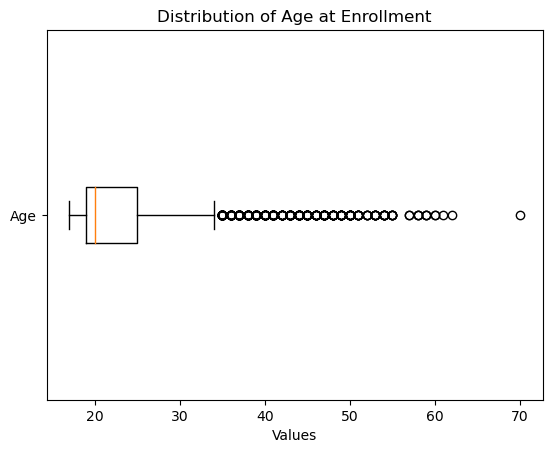

In [27]:
plt.boxplot(df['Age at enrollment'], vert=False);
plt.yticks([1], ['Age']);
plt.xlabel('Values');
plt.title('Distribution of Age at Enrollment');
# 34 and above is iqr

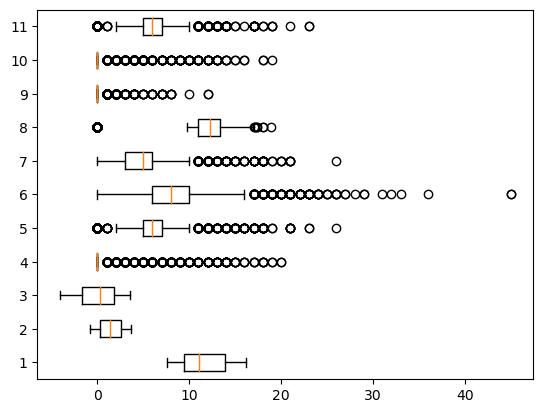

In [29]:
plt.boxplot(df[numeric_variables[3:14]], vert=False);

</br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br>

In [25]:
numeric_features = [
    'Age at enrollment',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]
df_relevant[numeric_features].describe()

,Age at enrollment,Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,11.566139,1.228029,0.001969
std,7.587816,2.663850,1.382711,2.269935
min,17.000000,7.600000,-0.800000,-4.060000
25%,19.000000,9.400000,0.300000,-1.700000
50%,20.000000,11.100000,1.400000,0.320000
75%,25.000000,13.900000,2.600000,1.790000
max,70.000000,16.200000,3.700000,3.510000


In [84]:
for column in df.columns:
    print(column)
    print(np.unique(np.array(df[column]), return_counts=True))
    print()

Marital status
(array([1, 2, 3, 4, 5, 6]), array([3919,  379,    4,   91,   25,    6]))

Application mode
(array([ 1,  2,  5,  7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53,
       57]), array([1708,    3,   16,  139,   10,   30,   38,  872,  124,    1,    1,
        785,   77,  312,  213,   59,   35,    1]))

Application order
(array([0, 1, 2, 3, 4, 5, 6, 9]), array([   1, 3026,  547,  309,  249,  154,  137,    1]))

Course
(array([  33,  171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254,
       9500, 9556, 9670, 9773, 9853, 9991]), array([ 12, 215, 215, 210, 226, 337, 170, 141, 380, 355, 252, 766,  86,
       268, 331, 192, 268]))

Daytime/evening attendance
(array([0, 1]), array([ 483, 3941]))

Previous qualification
(array([ 1,  2,  3,  4,  5,  6,  9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43]), array([3717,   23,  126,    8,    1,   16,   11,    4,   45,    1,    2,
        162,    7,  219,   40,   36,    6]))

Previous qualification (grade)
(array([ 95. ,  96. ,  97.

## 3. Data Visualization

In [44]:
np.shape(np.unique(df['Previous qualification'],return_counts=True))

(2, 17)

In [11]:
print(np.unique(np.array(df.Target), return_counts=True))
794/len(df.Target)

(array(['Dropout', 'Enrolled', 'Graduate'], dtype=object), array([1421,  794, 2209]))


0.1794755877034358

In [18]:
len(df.columns)

37